# Preliminary Data Exploration

In [1]:
import datetime
now = datetime.datetime.now()
print(f'Version: {now.strftime("%Y-%m-%d %H:%M:%S")}')

Version: 2020-02-04 10:41:37


# Data Exploration

In [5]:
import pandas as pd
import os

# load csv
directory = './data'
filename = 'TADPOLE_D1_D2.csv'

csv_path = os.path.join(directory, filename)
df = pd.read_csv(csv_path)
df

,RID,PTID,VISCODE,SITE,D1,D2,COLPROT,ORIGPROT,EXAMDATE,DX_bl,...,PHASE_UPENNBIOMK9_04_19_17,BATCH_UPENNBIOMK9_04_19_17,KIT_UPENNBIOMK9_04_19_17,STDS_UPENNBIOMK9_04_19_17,RUNDATE_UPENNBIOMK9_04_19_17,ABETA_UPENNBIOMK9_04_19_17,TAU_UPENNBIOMK9_04_19_17,PTAU_UPENNBIOMK9_04_19_17,COMMENT_UPENNBIOMK9_04_19_17,update_stamp_UPENNBIOMK9_04_19_17
0,2,011_S_0002,bl,11,1,1,ADNI1,ADNI1,2005-09-08,CN,...,,,,,,,,,,
1,3,011_S_0003,bl,11,1,0,ADNI1,ADNI1,2005-09-12,AD,...,ADNI1,UPENNBIOMK9,P06-MP02-MP01,P06-MP02-MP01/2,2016-12-14,741.5,239.7,22.83,NaN,2017-04-20 14:39:54.0
2,3,011_S_0003,m06,11,1,0,ADNI1,ADNI1,2006-03-13,AD,...,,,,,,,,,,
3,3,011_S_0003,m12,11,1,0,ADNI1,ADNI1,2006-09-12,AD,...,ADNI1,UPENNBIOMK9,P06-MP02-MP01,P06-MP02-MP01/2,2016-12-14,601.4,251.7,24.18,NaN,2017-04-20 14:39:54.0
4,3,011_S_0003,m24,11,1,0,ADNI1,ADNI1,2007-09-12,AD,...,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12736,4167,116_S_4167,m60,116,1,1,ADNI2,ADNI2,2016-11-16,LMCI,...,,,,,,,,,,
12737,4199,116_S_4199,m60,116,1,1,ADNI2,ADNI2,2016-12-12,EMCI,...,,,,,,,,,,
12738,4557,053_S_4557,m60,53,1,1,ADNI2,ADNI2,2017-03-15,EMCI,...,,,,,,,,,,
12739,4512,100_S_4512,m48,100,1,1,ADNI2,ADNI2,2017-04-04,EMCI,...,,,,,,,,,,


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12741 entries, 0 to 12740
Columns: 1907 entries, RID to update_stamp_UPENNBIOMK9_04_19_17
dtypes: float64(72), int64(8), object(1827)
memory usage: 185.4+ MB


In [7]:
# <-- This cell needs to be checked!!

# # add the age at exam
df.EXAMDATE = pd.to_datetime(df.EXAMDATE)
df_grouped = df.groupby('RID').apply(lambda x:(x['EXAMDATE']-x['EXAMDATE'].min()).dt.days/365.25 + x['AGE'].min())
df_grouped.sort_index(inplace=True)
df.sort_values(by=['RID','EXAMDATE'], inplace=True)
df['AGE_AT_EXAM'] = df_grouped.values
df['AGE_INT'] = df['AGE_AT_EXAM'].apply(int)
df.reset_index(drop=True)


,RID,PTID,VISCODE,SITE,D1,D2,COLPROT,ORIGPROT,EXAMDATE,DX_bl,...,KIT_UPENNBIOMK9_04_19_17,STDS_UPENNBIOMK9_04_19_17,RUNDATE_UPENNBIOMK9_04_19_17,ABETA_UPENNBIOMK9_04_19_17,TAU_UPENNBIOMK9_04_19_17,PTAU_UPENNBIOMK9_04_19_17,COMMENT_UPENNBIOMK9_04_19_17,update_stamp_UPENNBIOMK9_04_19_17,AGE_AT_EXAM,AGE_INT
0,2,011_S_0002,bl,11,1,1,ADNI1,ADNI1,2005-09-08,CN,...,,,,,,,,,74.300000,74
1,2,011_S_0002,m06,11,1,1,ADNI1,ADNI1,2006-03-06,CN,...,,,,,,,,,74.790075,74
2,2,011_S_0002,m36,11,1,1,ADNI1,ADNI1,2008-08-27,CN,...,,,,,,,,,77.267830,77
3,2,011_S_0002,m60,11,1,1,ADNIGO,ADNI1,2010-09-22,CN,...,,,,,,,,,79.337645,79
4,2,011_S_0002,m66,11,1,1,ADNIGO,ADNI1,2011-03-04,CN,...,,,,,,,,,79.783915,79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12736,5295,057_S_5295,bl,57,1,1,ADNI2,ADNI2,2013-12-11,SMC,...,P06-MP02-MP01,P06-MP02-MP01/2,2017-01-13,416.8,88.69,8.53,NaN,2017-04-20 14:39:56.0,75.500000,75
12737,5295,057_S_5295,m03,57,1,1,ADNI2,ADNI2,2014-02-14,SMC,...,,,,,,,,,75.677960,75
12738,5295,057_S_5295,m24,57,1,1,ADNI2,ADNI2,2015-12-08,SMC,...,,,,,,,,,77.490418,77
12739,5296,053_S_5296,bl,53,1,1,ADNI2,ADNI2,2013-12-18,SMC,...,P06-MP02-MP01,P06-MP02-MP01/2,2016-11-28,1460,224.9,20.9,NaN,2017-04-20 14:39:56.0,69.300000,69


In [8]:
# map the diagnosis values to those specified by the TADPOLE challenge

dx_map = {
        'MCI': 'MCI',
        'NL': 'CN',
        'Dementia': 'AD',
        'MCI to Dementia': 'AD',
        'NL to MCI': 'MCI',
        'MCI to NL': 'CN',
        'Dementia to MCI': 'MCI',
        'NL to Dementia': 'AD'
    }

df['diagnosis'] = df['DX'].map(dx_map)

# bear in mind that here we make no distrinction between catagorical and numerical fields yet

# these are the suggested biomarkers for those unfamilier with ADNI data
# according to https://tadpole.grand-challenge.org/Data/
features = {
    'dataset': ['RID', 'D1', 'D2'],
    'prediction': ['diagnosis', 'ADAS13', 'Ventricles'],
    'cognitive_tests': ['CDRSB', 'ADAS11', 'MMSE', 'RAVLT_immediate'],
    'mri': ['Hippocampus', 'WholeBrain', 'Entorhinal', 'MidTemp'],
    'pet': ['FDG', 'AV45'],
    'csf': ['ABETA_UPENNBIOMK9_04_19_17', 'TAU_UPENNBIOMK9_04_19_17', 'PTAU_UPENNBIOMK9_04_19_17'],
    'risk_factors': ['APOE4', 'AGE_AT_EXAM']
}

# make a shortcut list of the interesting columns
columns_of_interest = []
for feature_list in features.values():
    columns_of_interest += feature_list

In [9]:
# lets check out these interesting columns
df[columns_of_interest].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12741 entries, 0 to 12302
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   RID                         12741 non-null  int64  
 1   D1                          12741 non-null  int64  
 2   D2                          12741 non-null  int64  
 3   diagnosis                   8904 non-null   object 
 4   ADAS13                      8824 non-null   float64
 5   Ventricles                  7445 non-null   float64
 6   CDRSB                       8963 non-null   float64
 7   ADAS11                      8910 non-null   float64
 8   MMSE                        8932 non-null   float64
 9   RAVLT_immediate             8831 non-null   float64
 10  Hippocampus                 6802 non-null   float64
 11  WholeBrain                  7689 non-null   float64
 12  Entorhinal                  6469 non-null   float64
 13  MidTemp                     646

Looks like the csf columns are objects instead of numeric values

In [10]:
# lets just have a look at some samples to see
df[columns_of_interest]

,RID,D1,D2,diagnosis,ADAS13,Ventricles,CDRSB,ADAS11,MMSE,RAVLT_immediate,...,WholeBrain,Entorhinal,MidTemp,FDG,AV45,ABETA_UPENNBIOMK9_04_19_17,TAU_UPENNBIOMK9_04_19_17,PTAU_UPENNBIOMK9_04_19_17,APOE4,AGE_AT_EXAM
0,2,1,1,CN,18.67,118233.0,0.0,10.67,28.0,44.0,...,1229740.0,4177.0,27936.0,1.36926,NaN,,,,0.0,74.300000
5723,2,1,1,CN,19.67,NaN,0.0,10.67,28.0,40.0,...,NaN,NaN,NaN,1.21655,NaN,,,,0.0,74.790075
5724,2,1,1,CN,20.00,NaN,0.0,12.00,29.0,34.0,...,NaN,NaN,NaN,NaN,NaN,,,,0.0,77.267830
5725,2,1,1,CN,23.00,NaN,0.0,14.00,28.0,37.0,...,NaN,NaN,NaN,NaN,NaN,,,,0.0,79.337645
5726,2,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,,,,0.0,79.783915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10802,5295,1,1,CN,18.00,NaN,0.5,11.00,29.0,28.0,...,NaN,NaN,NaN,1.16317,1.31903,416.8,88.69,8.53,1.0,75.500000
10803,5295,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,,,,1.0,75.677960
12277,5295,1,1,CN,18.00,NaN,2.0,11.00,26.0,32.0,...,NaN,NaN,NaN,NaN,1.27419,,,,1.0,77.490418
10804,5296,1,1,CN,14.00,18633.0,0.0,9.00,29.0,38.0,...,1486040.0,4701.0,32189.0,1.42926,1.13838,1460,224.9,20.9,0.0,69.300000


The csf columns should definitely be numeric...

In [11]:
for feature in features['csf']:
    df[feature] = pd.to_numeric(df[feature], errors='coerce')

In [12]:
df[columns_of_interest].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12741 entries, 0 to 12302
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   RID                         12741 non-null  int64  
 1   D1                          12741 non-null  int64  
 2   D2                          12741 non-null  int64  
 3   diagnosis                   8904 non-null   object 
 4   ADAS13                      8824 non-null   float64
 5   Ventricles                  7445 non-null   float64
 6   CDRSB                       8963 non-null   float64
 7   ADAS11                      8910 non-null   float64
 8   MMSE                        8932 non-null   float64
 9   RAVLT_immediate             8831 non-null   float64
 10  Hippocampus                 6802 non-null   float64
 11  WholeBrain                  7689 non-null   float64
 12  Entorhinal                  6469 non-null   float64
 13  MidTemp                     646

That's better.
Although it loks like theres a significant number of null values in the dataset.

## Examining the NaNs

Lets visualise the null values.

In [13]:
# proportion of NaNs per feature
df[columns_of_interest].isnull().sum() / len(df)

RID                           0.000000
D1                            0.000000
D2                            0.000000
diagnosis                     0.301154
ADAS13                        0.307433
Ventricles                    0.415666
CDRSB                         0.296523
ADAS11                        0.300683
MMSE                          0.298956
RAVLT_immediate               0.306883
Hippocampus                   0.466133
WholeBrain                    0.396515
Entorhinal                    0.492269
MidTemp                       0.492269
FDG                           0.736912
AV45                          0.833765
ABETA_UPENNBIOMK9_04_19_17    0.813986
TAU_UPENNBIOMK9_04_19_17      0.814614
PTAU_UPENNBIOMK9_04_19_17     0.814928
APOE4                         0.000942
AGE_AT_EXAM                   0.000000
dtype: float64

Woah... looks like up to around 80% of the data is missing from some features!

This makes sense for the clinical features, because fewer patients would be expected to have undergone the procedures. Especially the csf procedure as its particularly invasive.

However, around 30% of the clinical diagnoses (and other target features) are missing...

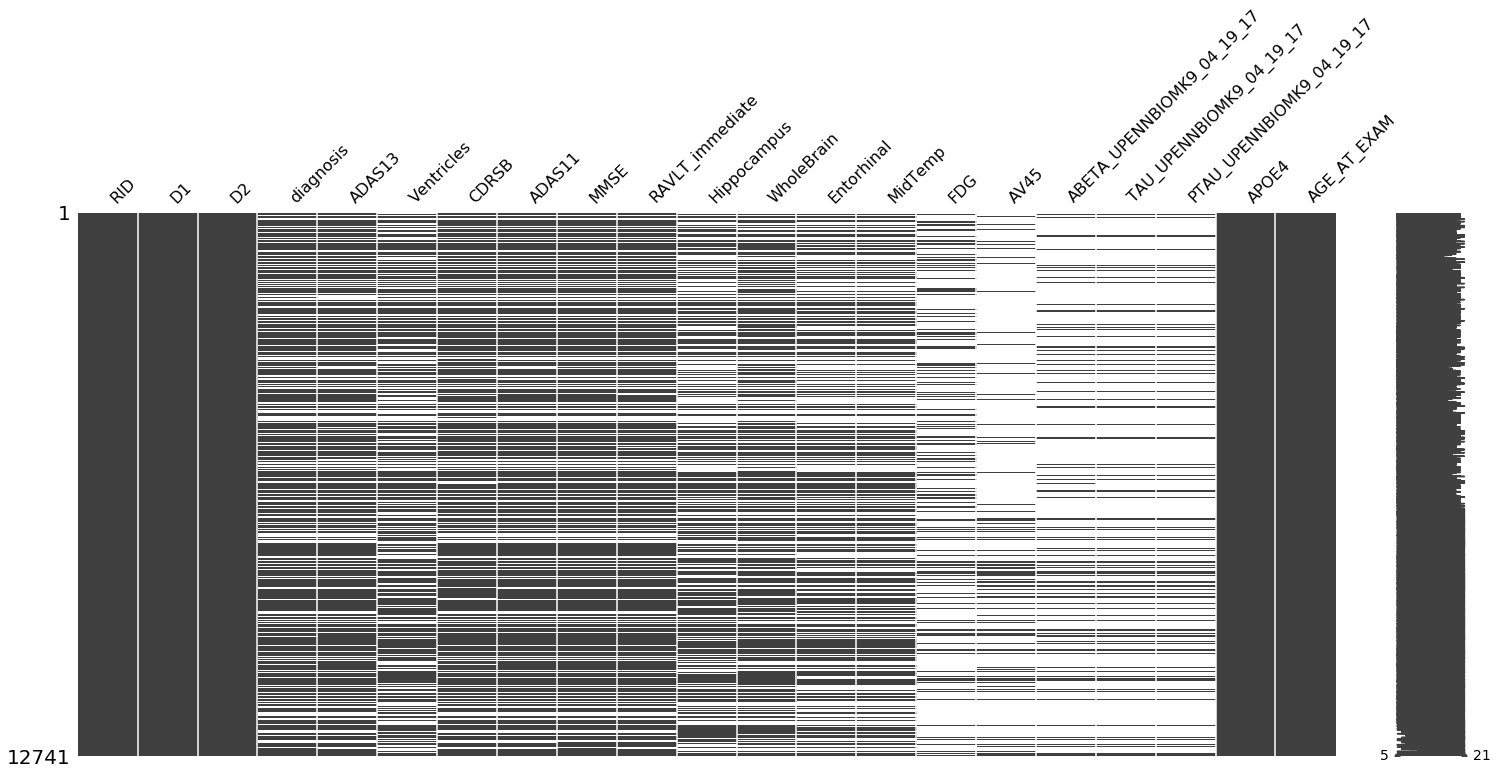

In [14]:
import missingno as msno

# This visualises the distribution of NaNs throughout 
# the dataset. Each NaN shows as a white line, and 
# each value shows as a black line.
msno.matrix(df[columns_of_interest])

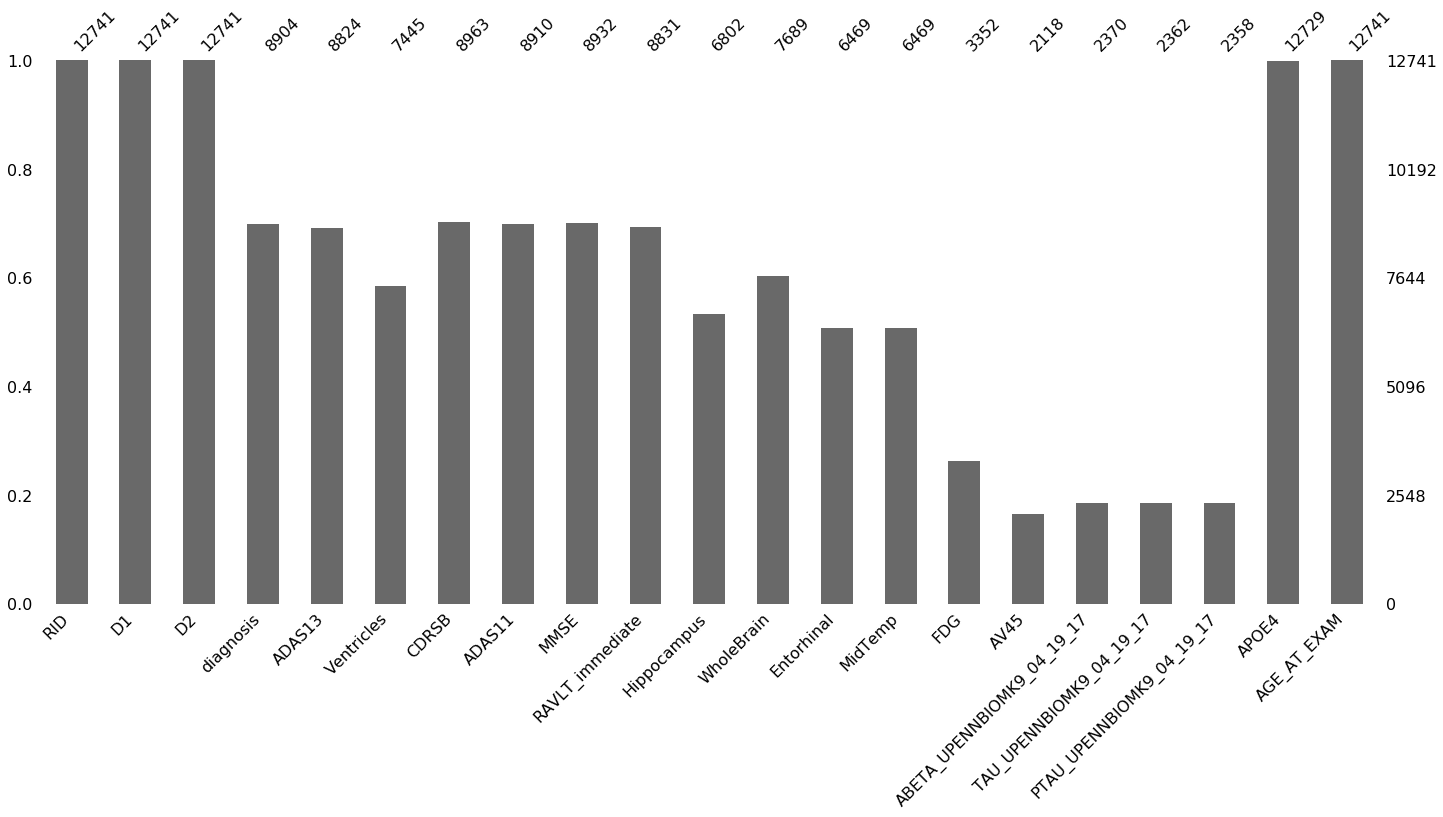

In [15]:
# Same deal as above; this is a bar chart of the number
# of values for each feature.
msno.bar(df[columns_of_interest])

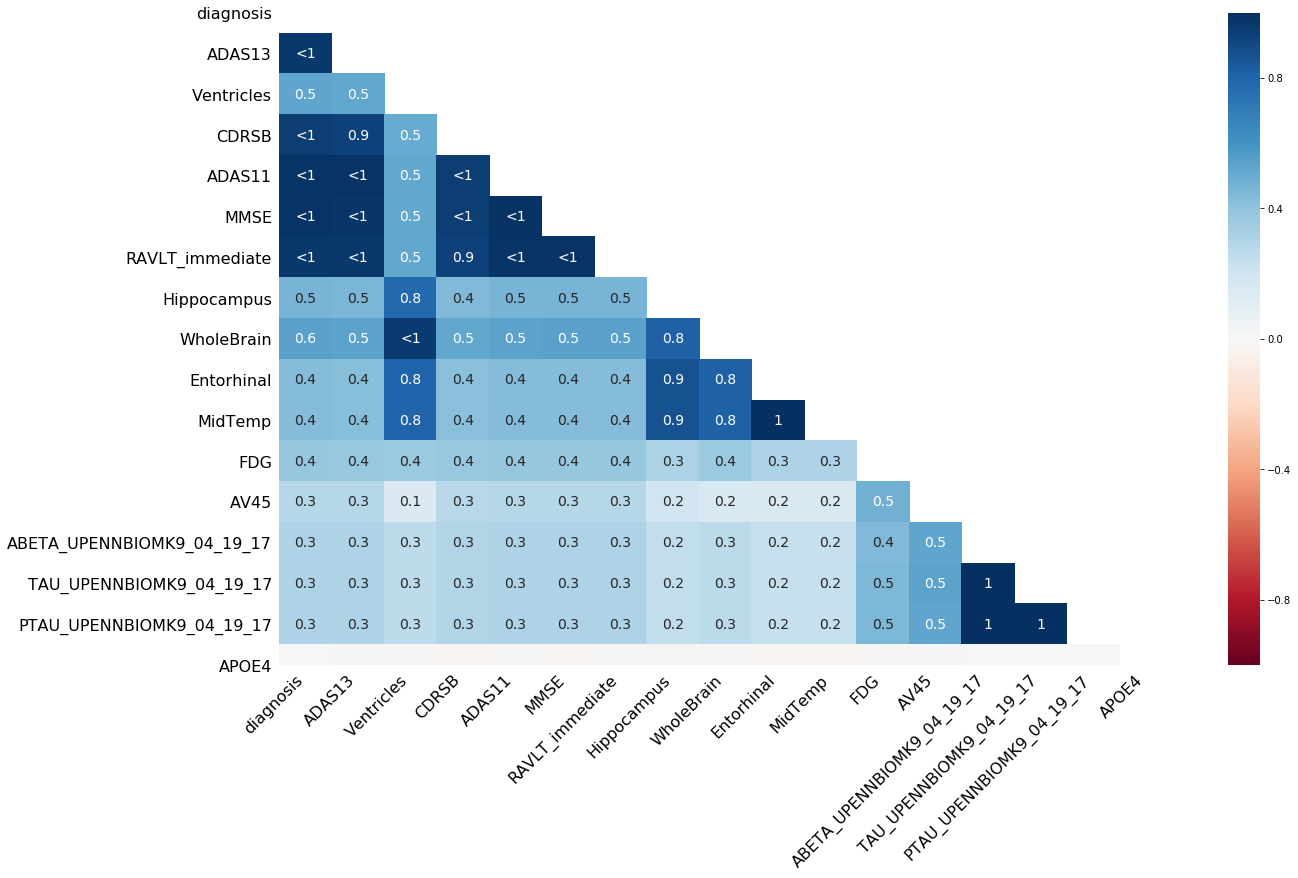

In [16]:
# A `seaborn` heatmap visualization of nullity correlation.
# 1 siginifies that if one value is missing then the other
# is likely to be missing, -1 signifies that if one value
# is present then the other is likely to be missing.
msno.heatmap(df[columns_of_interest])

# Benchmarks

## Making the benchmark datasets

In [18]:
excluded_features = features['pet'] + features['csf']
benchmark_df = df[[feature for feature in columns_of_interest if feature not in excluded_features]].dropna()
benchmark_df

,RID,D1,D2,diagnosis,ADAS13,Ventricles,CDRSB,ADAS11,MMSE,RAVLT_immediate,Hippocampus,WholeBrain,Entorhinal,MidTemp,APOE4,AGE_AT_EXAM
0,2,1,1,CN,18.67,118233.0,0.0,10.67,28.0,44.0,8336.0,1229740.0,4177.0,27936.0,0.0,74.300000
1,3,1,0,AD,31.00,84599.0,4.5,22.00,20.0,22.0,5319.0,1129830.0,1791.0,18422.0,1.0,81.300000
2,3,1,0,AD,30.00,88580.0,6.0,19.00,24.0,19.0,5446.0,1100060.0,2427.0,16972.0,1.0,81.798289
3,3,1,0,AD,35.00,90099.0,3.5,24.00,17.0,31.0,5157.0,1095640.0,1596.0,17330.0,1.0,82.299316
4,3,1,0,AD,37.67,97420.0,8.0,25.67,19.0,23.0,5139.0,1088560.0,1175.0,16398.0,1.0,82.794867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12275,5290,1,1,CN,7.00,12472.0,0.0,6.00,30.0,52.0,7424.0,1010220.0,3970.0,19348.0,1.0,69.017796
5588,5292,1,1,CN,5.00,14873.0,0.0,3.00,30.0,41.0,7102.0,985330.0,3789.0,17767.0,0.0,74.300000
12276,5292,1,1,CN,5.00,17160.0,0.5,3.00,29.0,31.0,6918.0,980610.0,3791.0,17196.0,0.0,76.317796
5587,5294,1,1,CN,11.00,21884.0,0.0,8.00,30.0,49.0,8119.0,1077990.0,4498.0,21762.0,1.0,68.500000


In [19]:
df['APOE4'].value_counts() / len(df)
# hmm this is a problem...
# why are there 2s in the APOE4 column?

0.0    0.552939
1.0    0.355467
2.0    0.090652
Name: APOE4, dtype: float64

Looks like around 10% of the APOE4 data have a value of 2...

Just as a quick fix for the moment we'll drop these values until we figure out what's going on.

In [20]:
benchmark_no2s_df = benchmark_df[benchmark_df['APOE4'] != 2.].reset_index(drop=True)
benchmark_no2s_df

,RID,D1,D2,diagnosis,ADAS13,Ventricles,CDRSB,ADAS11,MMSE,RAVLT_immediate,Hippocampus,WholeBrain,Entorhinal,MidTemp,APOE4,AGE_AT_EXAM
0,2,1,1,CN,18.67,118233.0,0.0,10.67,28.0,44.0,8336.0,1229740.0,4177.0,27936.0,0.0,74.300000
1,3,1,0,AD,31.00,84599.0,4.5,22.00,20.0,22.0,5319.0,1129830.0,1791.0,18422.0,1.0,81.300000
2,3,1,0,AD,30.00,88580.0,6.0,19.00,24.0,19.0,5446.0,1100060.0,2427.0,16972.0,1.0,81.798289
3,3,1,0,AD,35.00,90099.0,3.5,24.00,17.0,31.0,5157.0,1095640.0,1596.0,17330.0,1.0,82.299316
4,3,1,0,AD,37.67,97420.0,8.0,25.67,19.0,23.0,5139.0,1088560.0,1175.0,16398.0,1.0,82.794867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4827,5290,1,1,CN,7.00,12472.0,0.0,6.00,30.0,52.0,7424.0,1010220.0,3970.0,19348.0,1.0,69.017796
4828,5292,1,1,CN,5.00,14873.0,0.0,3.00,30.0,41.0,7102.0,985330.0,3789.0,17767.0,0.0,74.300000
4829,5292,1,1,CN,5.00,17160.0,0.5,3.00,29.0,31.0,6918.0,980610.0,3791.0,17196.0,0.0,76.317796
4830,5294,1,1,CN,11.00,21884.0,0.0,8.00,30.0,49.0,8119.0,1077990.0,4498.0,21762.0,1.0,68.500000


There's one more check to do  for NaNs: sometimes they've filled null values with -4

In [21]:
# check for -4 in the data (signifies NaNs)
# this is a pretty simple check...
# probably not the best thing to do...
benchmark_no2s_df.min()

RID                     2
D1                      0
D2                      0
diagnosis              AD
ADAS13                  0
Ventricles           5650
CDRSB                   0
ADAS11                  0
MMSE                    5
RAVLT_immediate         0
Hippocampus          2347
WholeBrain         649091
Entorhinal           1041
MidTemp              8788
APOE4                   0
AGE_AT_EXAM          54.4
dtype: object

In [22]:
# <-- need to rename the df in this cell

# add future predictions

# make list of target features
target_features = [''.join(['target_', value]) for value in features['prediction']]

# sort the data frame by RID and AGE_AT_EXAM inplace
benchmark_with_targets = benchmark_no2s_df.sort_values(['RID', 'AGE_AT_EXAM'])

grouped_by_rid = benchmark_with_targets.groupby('RID')

# select the prediction features and shift them up by 1
# (so each visit has the prediction of the next visit)
# --> the final visit will have NaN (because of the shift)
# --> shift will apply per group - https://stackoverflow.com/questions/26280345/pandas-shift-down-values-by-one-row-within-a-group
benchmark_with_targets[target_features] = grouped_by_rid[features['prediction']].shift(periods=-1)

# drop those with NaNs in the target features
benchmark_with_targets.dropna(inplace=True)
benchmark_with_targets

,RID,D1,D2,diagnosis,ADAS13,Ventricles,CDRSB,ADAS11,MMSE,RAVLT_immediate,Hippocampus,WholeBrain,Entorhinal,MidTemp,APOE4,AGE_AT_EXAM,target_diagnosis,target_ADAS13,target_Ventricles
1,3,1,0,AD,31.00,84599.0,4.5,22.00,20.0,22.0,5319.0,1129830.0,1791.0,18422.0,1.0,81.300000,AD,30.00,88580.0
2,3,1,0,AD,30.00,88580.0,6.0,19.00,24.0,19.0,5446.0,1100060.0,2427.0,16972.0,1.0,81.798289,AD,35.00,90099.0
3,3,1,0,AD,35.00,90099.0,3.5,24.00,17.0,31.0,5157.0,1095640.0,1596.0,17330.0,1.0,82.299316,AD,37.67,97420.0
5,4,1,0,MCI,21.33,39605.0,1.0,14.33,27.0,37.0,6869.0,1154980.0,3983.0,19615.0,0.0,67.500000,MCI,25.33,39726.0
6,4,1,0,MCI,25.33,39726.0,0.5,17.33,28.0,33.0,6439.0,1116280.0,3711.0,20139.0,0.0,67.979124,MCI,22.00,38527.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4811,5269,1,1,CN,12.00,18434.0,0.0,6.00,29.0,36.0,9668.0,1159690.0,4315.0,23106.0,1.0,64.900000,CN,6.00,19975.0
4816,5277,1,1,CN,6.00,25360.0,0.5,4.00,28.0,44.0,7278.0,1006710.0,4043.0,17258.0,1.0,71.800000,CN,10.00,29814.0
4824,5289,1,1,CN,12.00,35641.0,0.0,9.00,29.0,50.0,7878.0,1056630.0,3704.0,24697.0,1.0,59.700000,CN,6.00,37676.0
4826,5290,1,1,CN,6.00,10361.0,0.0,5.00,29.0,53.0,7541.0,1031530.0,3974.0,19189.0,1.0,67.000000,CN,7.00,12472.0


In [48]:
unique_rids = benchmark_no2s_df['RID'].unique()
test_rid = unique_rids[59]
benchmark_no2s_df[benchmark_no2s_df.RID == test_rid][['RID', 'AGE_AT_EXAM', 'Ventricles', 'target_Ventricles']]

KeyError: "['target_Ventricles'] not in index"

In [23]:
# seperate train and test sets based on whether participant is in D2
# we're treating each visit as a seperate sample from the disease progression

train = benchmark_with_targets[benchmark_with_targets['D2'] != 1]
test = benchmark_with_targets[benchmark_with_targets['D2'] == 1]

assert len(train) + len(test) == len(benchmark_with_targets)

print(f'train set size: {len(train)}')
print(f'test set size: {len(test)}')
print(f'full set size: {len(benchmark_with_targets)}')

# hmm... looks like we have a larger test set than training set...

train set size: 1465
test set size: 1953
full set size: 3418


In [27]:
# shuffle the data
import numpy as np

np.random.seed(42) # for reproducibility

shuffled_df = benchmark_with_targets.reindex(np.random.permutation(benchmark_with_targets.index)).reset_index(drop=True)
shuffled_df

,RID,D1,D2,diagnosis,ADAS13,Ventricles,CDRSB,ADAS11,MMSE,RAVLT_immediate,Hippocampus,WholeBrain,Entorhinal,MidTemp,APOE4,AGE_AT_EXAM,target_diagnosis,target_ADAS13,target_Ventricles
0,1268,1,1,MCI,15.00,87514.0,0.5,9.00,27.0,30.0,5666.0,1008410.0,3392.0,18951.0,1.0,82.700000,MCI,13.67,69137.0
1,4769,1,1,MCI,9.00,18536.0,3.5,5.00,30.0,59.0,7195.0,999068.0,2634.0,18223.0,0.0,58.000000,MCI,8.00,18577.0
2,89,1,1,CN,3.67,21339.0,0.0,2.67,30.0,54.0,7713.0,1079510.0,4468.0,23962.0,0.0,65.100000,CN,9.33,20650.0
3,403,1,0,CN,15.00,27337.0,0.0,10.00,30.0,30.0,7509.0,1043920.0,4562.0,18596.0,0.0,76.300000,CN,11.33,30176.0
4,4372,1,1,CN,6.00,20384.0,0.0,4.00,30.0,42.0,8080.0,949924.0,3671.0,18841.0,0.0,70.462697,CN,4.00,21040.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3413,669,1,0,CN,14.67,37522.0,0.0,9.67,26.0,38.0,8069.0,1137760.0,3292.0,19351.0,1.0,65.122245,CN,14.33,38326.0
3414,681,1,0,CN,1.00,45463.0,0.0,1.00,30.0,71.0,7282.0,974032.0,3518.0,20225.0,1.0,77.875975,CN,2.00,48985.0
3415,793,1,0,AD,48.67,26782.0,7.0,34.67,20.0,10.0,6196.0,989425.0,2489.0,15177.0,1.0,69.899316,AD,58.67,32609.0
3416,516,1,0,CN,9.67,23906.0,0.0,4.67,28.0,43.0,7588.0,1056560.0,4513.0,19551.0,0.0,88.098289,CN,15.00,23005.0


In [29]:
# perhaps we should split the data set in an 80:20 proportion for simplicity
# assuming that each visit as a seperate sample from the disease progression

train_fraction = 0.8

train = benchmark_with_targets.iloc[:int(len(benchmark_with_targets) * train_fraction)].reset_index(drop=True)
test = benchmark_with_targets.iloc[int(len(benchmark_with_targets) * train_fraction):].reset_index(drop=True)

assert len(train) + len(test) == len(benchmark_with_targets)

print(f'train set as fraction of full set: {train_fraction}')
print(f'train set size: {len(train)}')
print(f'test set size: {len(test)}')
print(f'full set size: {len(benchmark_with_targets)}')

train set as fraction of full set: 0.8
train set size: 2734
test set size: 684
full set size: 3418


In [30]:
train

,RID,D1,D2,diagnosis,ADAS13,Ventricles,CDRSB,ADAS11,MMSE,RAVLT_immediate,Hippocampus,WholeBrain,Entorhinal,MidTemp,APOE4,AGE_AT_EXAM,target_diagnosis,target_ADAS13,target_Ventricles
0,3,1,0,AD,31.00,84599.0,4.5,22.00,20.0,22.0,5319.0,1129830.0,1791.0,18422.0,1.0,81.300000,AD,30.00,88580.0
1,3,1,0,AD,30.00,88580.0,6.0,19.00,24.0,19.0,5446.0,1100060.0,2427.0,16972.0,1.0,81.798289,AD,35.00,90099.0
2,3,1,0,AD,35.00,90099.0,3.5,24.00,17.0,31.0,5157.0,1095640.0,1596.0,17330.0,1.0,82.299316,AD,37.67,97420.0
3,4,1,0,MCI,21.33,39605.0,1.0,14.33,27.0,37.0,6869.0,1154980.0,3983.0,19615.0,0.0,67.500000,MCI,25.33,39726.0
4,4,1,0,MCI,25.33,39726.0,0.5,17.33,28.0,33.0,6439.0,1116280.0,3711.0,20139.0,0.0,67.979124,MCI,22.00,38527.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2729,4272,1,1,MCI,17.00,34680.0,1.5,9.00,25.0,27.0,7082.0,987579.0,3524.0,18255.0,0.0,71.877413,MCI,15.00,36882.0
2730,4272,1,1,MCI,15.00,36882.0,1.5,8.00,25.0,23.0,6592.0,969429.0,3371.0,17373.0,0.0,72.416769,MCI,10.00,36237.0
2731,4274,1,0,MCI,9.00,25466.0,1.0,4.00,30.0,43.0,9180.0,1154790.0,3354.0,22141.0,1.0,63.000000,MCI,10.00,24430.0
2732,4275,1,1,CN,10.00,44838.0,0.0,6.00,29.0,48.0,7864.0,1230920.0,4084.0,25071.0,0.0,72.800000,CN,10.00,46542.0


In [31]:
test

,RID,D1,D2,diagnosis,ADAS13,Ventricles,CDRSB,ADAS11,MMSE,RAVLT_immediate,Hippocampus,WholeBrain,Entorhinal,MidTemp,APOE4,AGE_AT_EXAM,target_diagnosis,target_ADAS13,target_Ventricles
0,4276,1,1,CN,9.0,24554.0,0.0,5.0,29.0,45.0,7150.0,1036300.0,3402.0,18366.0,1.0,73.900000,CN,3.0,24579.0
1,4276,1,1,CN,3.0,24579.0,0.0,2.0,30.0,40.0,7060.0,1025550.0,3711.0,18051.0,1.0,74.455784,CN,6.0,25073.0
2,4276,1,1,CN,6.0,25073.0,0.0,3.0,30.0,48.0,7230.0,1039400.0,3722.0,18818.0,1.0,74.907529,CN,4.0,28854.0
3,4277,1,1,CN,8.0,13843.0,0.0,5.0,28.0,52.0,5859.0,932238.0,2260.0,17805.0,0.0,71.400000,CN,6.0,15366.0
4,4277,1,1,CN,6.0,15366.0,0.0,3.0,28.0,51.0,5802.0,913293.0,1938.0,17763.0,0.0,72.048871,MCI,5.0,15367.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
679,5269,1,1,CN,12.0,18434.0,0.0,6.0,29.0,36.0,9668.0,1159690.0,4315.0,23106.0,1.0,64.900000,CN,6.0,19975.0
680,5277,1,1,CN,6.0,25360.0,0.5,4.0,28.0,44.0,7278.0,1006710.0,4043.0,17258.0,1.0,71.800000,CN,10.0,29814.0
681,5289,1,1,CN,12.0,35641.0,0.0,9.0,29.0,50.0,7878.0,1056630.0,3704.0,24697.0,1.0,59.700000,CN,6.0,37676.0
682,5290,1,1,CN,6.0,10361.0,0.0,5.0,29.0,53.0,7541.0,1031530.0,3974.0,19189.0,1.0,67.000000,CN,7.0,12472.0


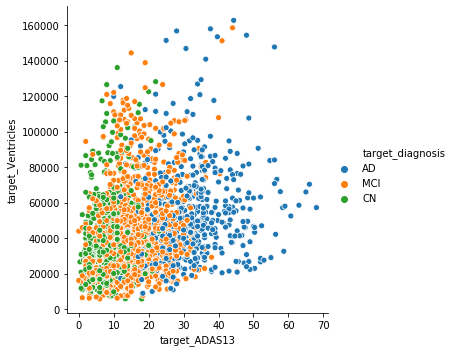

In [47]:
import seaborn as sns

sns.relplot(x='target_ADAS13', y='target_Ventricles', hue='target_diagnosis', data=train)

In [41]:
# save train and test sets to csv
train_csv = 'benchmark_train.csv'
test_csv = 'benchmark_test.csv'

train.to_csv(os.path.join(directory, train_csv), index=False)
test.to_csv(os.path.join(directory, test_csv), index=False)

In [42]:
# check imports
train_csv = 'benchmark_train.csv'
test_csv = 'benchmark_test.csv'

benchmark_train_df = pd.read_csv(os.path.join(directory, train_csv))
benchmark_test_df = pd.read_csv(os.path.join(directory, test_csv))

In [43]:
benchmark_train_df

,RID,D1,D2,diagnosis,ADAS13,Ventricles,CDRSB,ADAS11,MMSE,RAVLT_immediate,Hippocampus,WholeBrain,Entorhinal,MidTemp,APOE4,AGE_AT_EXAM,target_diagnosis,target_ADAS13,target_Ventricles
0,3,1,0,AD,31.00,84599.0,4.5,22.00,20.0,22.0,5319.0,1129830.0,1791.0,18422.0,1.0,81.300000,AD,30.00,88580.0
1,3,1,0,AD,30.00,88580.0,6.0,19.00,24.0,19.0,5446.0,1100060.0,2427.0,16972.0,1.0,81.798289,AD,35.00,90099.0
2,3,1,0,AD,35.00,90099.0,3.5,24.00,17.0,31.0,5157.0,1095640.0,1596.0,17330.0,1.0,82.299316,AD,37.67,97420.0
3,4,1,0,MCI,21.33,39605.0,1.0,14.33,27.0,37.0,6869.0,1154980.0,3983.0,19615.0,0.0,67.500000,MCI,25.33,39726.0
4,4,1,0,MCI,25.33,39726.0,0.5,17.33,28.0,33.0,6439.0,1116280.0,3711.0,20139.0,0.0,67.979124,MCI,22.00,38527.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2729,4272,1,1,MCI,17.00,34680.0,1.5,9.00,25.0,27.0,7082.0,987579.0,3524.0,18255.0,0.0,71.877413,MCI,15.00,36882.0
2730,4272,1,1,MCI,15.00,36882.0,1.5,8.00,25.0,23.0,6592.0,969429.0,3371.0,17373.0,0.0,72.416769,MCI,10.00,36237.0
2731,4274,1,0,MCI,9.00,25466.0,1.0,4.00,30.0,43.0,9180.0,1154790.0,3354.0,22141.0,1.0,63.000000,MCI,10.00,24430.0
2732,4275,1,1,CN,10.00,44838.0,0.0,6.00,29.0,48.0,7864.0,1230920.0,4084.0,25071.0,0.0,72.800000,CN,10.00,46542.0


In [44]:
benchmark_test_df

,RID,D1,D2,diagnosis,ADAS13,Ventricles,CDRSB,ADAS11,MMSE,RAVLT_immediate,Hippocampus,WholeBrain,Entorhinal,MidTemp,APOE4,AGE_AT_EXAM,target_diagnosis,target_ADAS13,target_Ventricles
0,4276,1,1,CN,9.0,24554.0,0.0,5.0,29.0,45.0,7150.0,1036300.0,3402.0,18366.0,1.0,73.900000,CN,3.0,24579.0
1,4276,1,1,CN,3.0,24579.0,0.0,2.0,30.0,40.0,7060.0,1025550.0,3711.0,18051.0,1.0,74.455784,CN,6.0,25073.0
2,4276,1,1,CN,6.0,25073.0,0.0,3.0,30.0,48.0,7230.0,1039400.0,3722.0,18818.0,1.0,74.907529,CN,4.0,28854.0
3,4277,1,1,CN,8.0,13843.0,0.0,5.0,28.0,52.0,5859.0,932238.0,2260.0,17805.0,0.0,71.400000,CN,6.0,15366.0
4,4277,1,1,CN,6.0,15366.0,0.0,3.0,28.0,51.0,5802.0,913293.0,1938.0,17763.0,0.0,72.048871,MCI,5.0,15367.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
679,5269,1,1,CN,12.0,18434.0,0.0,6.0,29.0,36.0,9668.0,1159690.0,4315.0,23106.0,1.0,64.900000,CN,6.0,19975.0
680,5277,1,1,CN,6.0,25360.0,0.5,4.0,28.0,44.0,7278.0,1006710.0,4043.0,17258.0,1.0,71.800000,CN,10.0,29814.0
681,5289,1,1,CN,12.0,35641.0,0.0,9.0,29.0,50.0,7878.0,1056630.0,3704.0,24697.0,1.0,59.700000,CN,6.0,37676.0
682,5290,1,1,CN,6.0,10361.0,0.0,5.0,29.0,53.0,7541.0,1031530.0,3974.0,19189.0,1.0,67.000000,CN,7.0,12472.0
